# Toxic Comment Classifier - Kaggle
    
    Shobhit Singh(M20PH205) 

---

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
import time
import warnings

In [67]:
from sklearn.metrics import f1_score


In [68]:
warnings.filterwarnings('ignore')

In [69]:
df_train = pd.read_csv('train')

In [70]:
df_test = pd.read_csv('test')

In [71]:
df_test.describe()

,id,comment_text
count,47848,47848
unique,47848,47848
top,00025465d4725e87,"""\n\nCongratulations from me as well, use the ..."
freq,1,1


In [72]:
df_train

,id,comment_text,Prediction
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,"0,0,0,0,0,0"
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,"0,0,0,0,0,0"
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...","0,0,0,0,0,0"
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...","0,0,0,0,0,0"
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...","0,0,0,0,0,0"
...,...,...,...
111718,ffd72e9766c09c97,"""\n Auto guides and the motoring press are not...","0,0,0,0,0,0"
111719,ffe029a7c79dc7fe,"""\nplease identify what part of BLP applies be...","0,0,0,0,0,0"
111720,ffe897e7f7182c90,Catalan independentism is the social movement ...,"0,0,0,0,0,0"
111721,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...","0,0,0,0,0,0"


In [73]:
df_test

,id,comment_text
0,00025465d4725e87,"""\n\nCongratulations from me as well, use the ..."
1,00031b1e95af7921,Your vandalism to the Matt Shirvington article...
2,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...
3,00054a5e18b50dd4,bbq \n\nbe a man and lets discuss it-maybe ove...
4,00078f8ce7eb276d,"""\n\nJuelz Santanas Age\n\nIn 2002, Juelz Sant..."
...,...,...
47843,ffd2e85b07b3c7e4,"""\nNo he did not, read it again (I would have ..."
47844,ffe8b9316245be30,The numbers in parentheses are the additional ...
47845,ffe987279560d7ff,""":::::And for the second time of asking, when ..."
47846,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...


In [74]:
classes = ["class1", "class2", "class3", "class4", "class5", "class6"]

In [75]:
for i in classes:
    df_train[i] = 0

In [76]:
vals, counts = np.unique(df_train['class1'] , return_counts=True)
print(vals, counts)

[0] [111723]


In [77]:
for i in range(len(df_train)):
    df_train['class1'][i] = df_train['Prediction'][i].split(',')[0]
    df_train['class2'][i] = df_train['Prediction'][i].split(',')[1]
    df_train['class3'][i] = df_train['Prediction'][i].split(',')[2]
    df_train['class4'][i] = df_train['Prediction'][i].split(',')[3]
    df_train['class5'][i] = df_train['Prediction'][i].split(',')[4]
    df_train['class6'][i] = df_train['Prediction'][i].split(',')[5]

In [78]:
vals1, counts1 = np.unique(df_train['class1'] , return_counts=True)
print(vals1, counts1)

['0' '1'] [101047  10676]


There are 10676 occurances of unwanted words in class 1 and 101047 occurances of wanted words in class 1.

In [79]:
vals2, counts2 = np.unique(df_train['class2'] , return_counts=True)
print(vals2, counts2)

['0' '1'] [110636   1087]


In [80]:
vals3, counts3 = np.unique(df_train['class3'] , return_counts=True)
print(vals3, counts3)

['0' '1'] [105818   5905]


In [81]:
vals4, counts4 = np.unique(df_train['class4'] , return_counts=True)
print(vals4, counts4)

['0' '1'] [111402    321]


In [82]:
vals5, counts5 = np.unique(df_train['class5'] , return_counts=True)
print(vals5, counts5)

['0' '1'] [106200   5523]


In [83]:
vals6, counts6 = np.unique(df_train['class6'] , return_counts=True)
print(vals6, counts6)

['0' '1'] [110756    967]


In [84]:
counts = [counts1[1], counts2[1], counts3[1], counts4[1], counts5[1], counts6[1]]

In [85]:
df_train['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [86]:
df_train_new = df_train.drop(['Prediction'], axis=1)
df_train_new

,id,comment_text,class1,class2,class3,class4,class5,class6
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
111718,ffd72e9766c09c97,"""\n Auto guides and the motoring press are not...",0,0,0,0,0,0
111719,ffe029a7c79dc7fe,"""\nplease identify what part of BLP applies be...",0,0,0,0,0,0
111720,ffe897e7f7182c90,Catalan independentism is the social movement ...,0,0,0,0,0,0
111721,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0


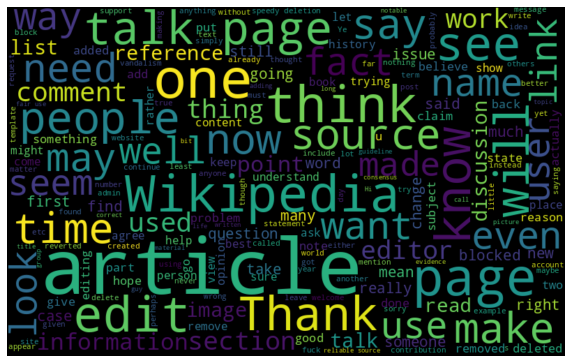

In [87]:
from wordcloud import WordCloud
words = ' '.join(df_train_new['comment_text'])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [88]:
print(classes, counts)

['class1', 'class2', 'class3', 'class4', 'class5', 'class6'] [10676, 1087, 5905, 321, 5523, 967]


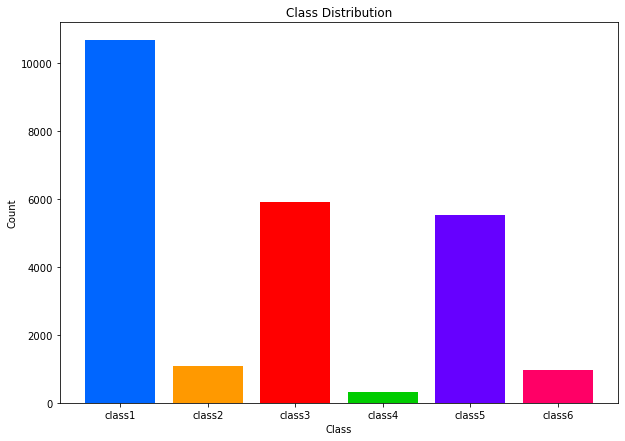

In [89]:
plt.figure(figsize=(10, 7))
plt.bar(classes, counts, color=['#0066ff', '#ff9900', '#ff0000', '#00cc00', '#6600ff', '#ff0066'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [90]:
import re
import nltk

In [91]:
def clean_text_data(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"I'm", "I am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub('[0-9]', '', text)
    text = re.sub("\'", "", text)
    text = re.sub(r"\S*https?:\S*", " ", text)
    text = re.sub(r"\S*www.\S*", " ", text)
    text = text.strip(' ')
    return text

df_train_new['comment_text'] = df_train_new['comment_text'].apply(clean_text_data)
df_test['comment_text'] = df_test['comment_text'].apply(clean_text_data)
df_train_new['comment_text'][0]    

'explanation why the edits made under my username hardcore metallica fan were reverted they were not vandalisms just closure on some gas after i voted at new york dolls fac and please do not remove the template from the talk page since i am retired now'

In [92]:
df_train_new = df_train_new.drop(['id'], axis=1)
df_train_new

,comment_text,class1,class2,class3,class4,class5,class6
0,explanation why the edits made under my userna...,0,0,0,0,0,0
1,d aww he matches this background colour i am s...,0,0,0,0,0,0
2,hey man i am really not trying to edit war it ...,0,0,0,0,0,0
3,more i cannot make any real suggestions on imp...,0,0,0,0,0,0
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0
...,...,...,...,...,...,...,...
111718,auto guides and the motoring press are not goo...,0,0,0,0,0,0
111719,please identify what part of blp applies becau...,0,0,0,0,0,0
111720,catalan independentism is the social movement ...,0,0,0,0,0,0
111721,spitzer umm theres no actual article for prost...,0,0,0,0,0,0


In [93]:
df_test = df_test.drop(['id'], axis=1)
df_test

,comment_text
0,congratulations from me as well use the tools ...
1,your vandalism to the matt shirvington article...
2,sorry if the word nonsense was offensive to yo...
3,bbq be a man and lets discuss it maybe over th...
4,juelz santanas age in juelz santana was year...
...,...
47843,no he did not read it again i would have thoug...
47844,the numbers in parentheses are the additional ...
47845,and for the second time of asking when your vi...
47846,you should be ashamed of yourself that is a ho...


In [94]:
from sklearn.model_selection import train_test_split

X, y1, y2, y3, y4, y5, y6 = df_train_new['comment_text'], df_train_new['class1'], df_train_new['class2'], df_train_new['class3'], df_train_new['class4'], df_train_new['class5'], df_train_new['class6']

print(X.shape, y1.shape, y2.shape, y3.shape, y4.shape, y5.shape, y6.shape)

(111723,) (111723,) (111723,) (111723,) (111723,) (111723,) (111723,)


In [95]:
X_train1, X_val1, y1_train, y1_val = train_test_split(X, y1, test_size=0.3, random_state=42)
X_train2, X_val2, y2_train, y2_val = train_test_split(X, y2, test_size=0.3, random_state=42)
X_train3, X_val3, y3_train, y3_val = train_test_split(X, y3, test_size=0.3, random_state=42)
X_train4, X_val4, y4_train, y4_val = train_test_split(X, y4, test_size=0.3, random_state=42)
X_train5, X_val5, y5_train, y5_val = train_test_split(X, y5, test_size=0.3, random_state=42)
X_train6, X_val6, y6_train, y6_val = train_test_split(X, y6, test_size=0.3, random_state=42)

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer 

vectorizer = TfidfVectorizer(use_idf=True)

In [97]:
df_train_new

,comment_text,class1,class2,class3,class4,class5,class6
0,explanation why the edits made under my userna...,0,0,0,0,0,0
1,d aww he matches this background colour i am s...,0,0,0,0,0,0
2,hey man i am really not trying to edit war it ...,0,0,0,0,0,0
3,more i cannot make any real suggestions on imp...,0,0,0,0,0,0
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0
...,...,...,...,...,...,...,...
111718,auto guides and the motoring press are not goo...,0,0,0,0,0,0
111719,please identify what part of blp applies becau...,0,0,0,0,0,0
111720,catalan independentism is the social movement ...,0,0,0,0,0,0
111721,spitzer umm theres no actual article for prost...,0,0,0,0,0,0


In [98]:
df_test

,comment_text
0,congratulations from me as well use the tools ...
1,your vandalism to the matt shirvington article...
2,sorry if the word nonsense was offensive to yo...
3,bbq be a man and lets discuss it maybe over th...
4,juelz santanas age in juelz santana was year...
...,...
47843,no he did not read it again i would have thoug...
47844,the numbers in parentheses are the additional ...
47845,and for the second time of asking when your vi...
47846,you should be ashamed of yourself that is a ho...


In [99]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC

In [100]:
model = make_pipeline(vectorizer, LinearSVC())
model.fit(X_train1, y1_train)
pred_val1 = model.predict(X_val1)
score1 = f1_score(y1_val, pred_val1, average='weighted')
print(score1)

0.9564956515884862


In [101]:
model.fit(X_train2, y2_train)
pred_val2 = model.predict(X_val2)
score2 = f1_score(y2_val, pred_val2, average='weighted')
print(score2)

0.9892005733267106


In [102]:
model.fit(X_train3, y3_train)
pred_val3 = model.predict(X_val3)
score3 = f1_score(y3_val, pred_val3, average='weighted')
print(score3)

0.9766938893719227


In [103]:
model.fit(X_train4, y4_train)
pred_val4 = model.predict(X_val4)
score4 = f1_score(y4_val, pred_val4, average='weighted')
print(score4)

0.9964702280516485


In [104]:
model.fit(X_train5, y5_train)
pred_val5 = model.predict(X_val5)
score5 = f1_score(y5_val, pred_val5, average='weighted')
print(score5)

0.9684489987961976


In [105]:
model.fit(X_train6, y6_train)
pred_val6 = model.predict(X_val6)
score6 = f1_score(y6_val, pred_val6, average='weighted')
print(score6)

0.9899539898142129


In [106]:
df_test

,comment_text
0,congratulations from me as well use the tools ...
1,your vandalism to the matt shirvington article...
2,sorry if the word nonsense was offensive to yo...
3,bbq be a man and lets discuss it maybe over th...
4,juelz santanas age in juelz santana was year...
...,...
47843,no he did not read it again i would have thoug...
47844,the numbers in parentheses are the additional ...
47845,and for the second time of asking when your vi...
47846,you should be ashamed of yourself that is a ho...


In [107]:
# Training complete dataset for testing data

model.fit(X, y1)
pred_test1 = model.predict(df_test['comment_text'])
print(pred_test1)

model.fit(X, y2)
pred_test2 = model.predict(df_test['comment_text'])
print(pred_test2)

model.fit(X, y3)
pred_test3 = model.predict(df_test['comment_text'])
print(pred_test3)

model.fit(X, y4)
pred_test4 = model.predict(df_test['comment_text'])
print(pred_test4)

model.fit(X, y5)
pred_test5 = model.predict(df_test['comment_text'])
print(pred_test5)

model.fit(X, y6)
pred_test6 = model.predict(df_test['comment_text'])
print(pred_test6)

['0' '0' '0' ... '0' '1' '0']
['0' '0' '0' ... '0' '0' '0']
['0' '0' '0' ... '0' '0' '0']
['0' '0' '0' ... '0' '0' '0']
['0' '0' '0' ... '0' '0' '0']
['0' '0' '0' ... '0' '0' '0']


In [108]:
pred_test1 = pred_test1.astype(int)
pred_test2 = pred_test2.astype(int)
pred_test3 = pred_test3.astype(int)
pred_test4 = pred_test4.astype(int)
pred_test5 = pred_test5.astype(int)
pred_test6 = pred_test6.astype(int)

In [122]:
y_pred = []

In [123]:
y_pred = [pred_test1, pred_test2, pred_test3, pred_test4, pred_test5, pred_test6]
y_pred = pd.DataFrame(y_pred)
y_pred = y_pred.transpose()
y_pred

,0,1,2,3,4,5
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
47843,0,0,0,0,0,0
47844,0,0,0,0,0,0
47845,0,0,0,0,0,0
47846,1,0,0,0,0,0


In [124]:
columns = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6']
y_pred.columns = columns

In [125]:
y_pred['Prediction'] = y_pred[['class1', 'class2', 'class3', 'class4', 'class5', 'class6']].values.tolist()

In [126]:
y_pred

,class1,class2,class3,class4,class5,class6,Prediction
0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]"
1,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]"
2,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]"
3,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]"
4,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...
47843,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]"
47844,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]"
47845,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]"
47846,1,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]"


In [127]:
y_pred.drop(['class1', 'class2', 'class3', 'class4', 'class5', 'class6'], axis=1, inplace=True)

In [128]:
y_pred

,Prediction
0,"[0, 0, 0, 0, 0, 0]"
1,"[0, 0, 0, 0, 0, 0]"
2,"[0, 0, 0, 0, 0, 0]"
3,"[0, 0, 0, 0, 0, 0]"
4,"[0, 0, 0, 0, 0, 0]"
...,...
47843,"[0, 0, 0, 0, 0, 0]"
47844,"[0, 0, 0, 0, 0, 0]"
47845,"[0, 0, 0, 0, 0, 0]"
47846,"[1, 0, 0, 0, 0, 0]"


In [129]:
def listToString(s):
    listToStr = ','.join([str(elem) for elem in s])
    return listToStr

In [130]:
for i in range(y_pred.shape[0]):
    y_pred.iloc[i, 0] = listToString(y_pred.iloc[i, 0])
y_pred

,Prediction
0,"0,0,0,0,0,0"
1,"0,0,0,0,0,0"
2,"0,0,0,0,0,0"
3,"0,0,0,0,0,0"
4,"0,0,0,0,0,0"
...,...
47843,"0,0,0,0,0,0"
47844,"0,0,0,0,0,0"
47845,"0,0,0,0,0,0"
47846,"1,0,0,0,0,0"


In [131]:
indexes = [int(i) for i in range(0, len(y_pred))]
pd.DataFrame({'Id': indexes, 'Prediction': y_pred['Prediction']}).to_csv('Submission.csv', index=False)